### Keras API project peer-to-peer lending platform 
using dataset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Our Goal Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

In [1]:
import pandas as pd

In [2]:
info_data = pd.read_csv(r'C:\Users\Data\data tensorflow\lending_club_info.csv', index_col ='LoanStatNew')

In [3]:
info_data

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
print(info_data.loc['pub_rec_bankruptcies']['Description'])

Number of public record bankruptcies


In [5]:
def call_info(col_name):
    print(info_data.loc[col_name]['Description'])

In [6]:
call_info('mort_acc')

Number of mortgage accounts.


----
----

In [7]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r'C:\Users\Data\data tensorflow\lending_club_loan_two.csv')

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [10]:
df.shape

(396030, 27)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


---
---

## 1. EDA (Exploratory Data Analysis)

In [13]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [14]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [15]:
call_info('loan_status')

Current status of the loan


In [16]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [17]:
plt.style.use(['science','notebook','grid'])

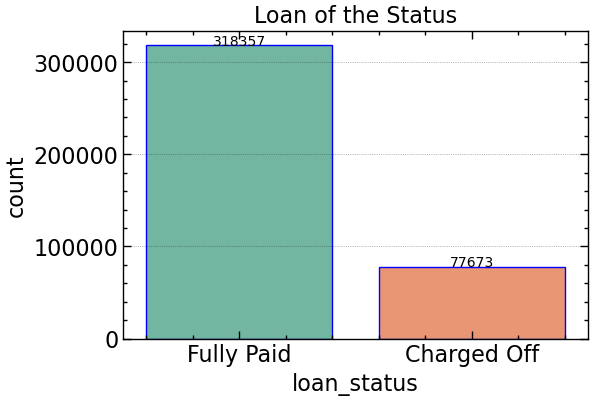

In [18]:
plt.figure(figsize=(6,4), dpi=100)

ax = sns.countplot(x='loan_status', data=df, palette='Set2', edgecolor='b');
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height+ 400,
            s = '{:.0f}'.format(height),
            ha = 'center'
           )
plt.title('Loan of the Status');

**kesipulan:** terdapat unbalanc antara `Fully Paid` pembayaran yang terselesaikan sebanyak `319357` dengan `Charged Off` pembayaran yang tertunda sebanyak `7873`

---


In [19]:
call_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


C:\Users\ibrahim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


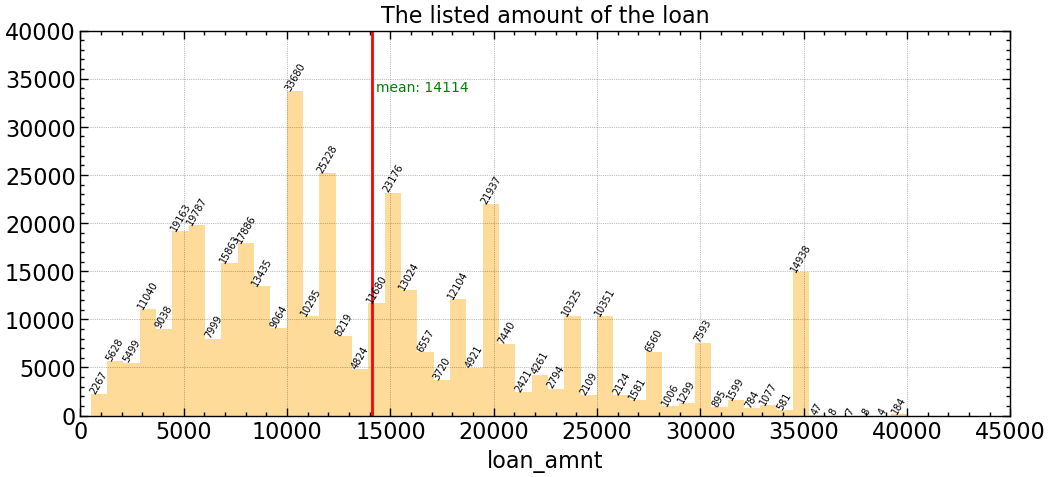

In [20]:
plt.figure(figsize=(12, 5), dpi=100)

ax = sns.distplot(df['loan_amnt'], kde=False, color='orange');

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2), 
                y = height+ 100,
                    s =  '{:.0f}'.format(height),
                    ha = 'center',
                    size = 7,
                    rotation = 60
           )
plt.axvline(df['loan_amnt'].mean(), color='red')
plt.text(x = df['loan_amnt'].mean() +200,
         y = max([h.get_height() for h in ax.patches]), 
         s = 'mean: {:.0f}'.format(df['loan_amnt'].mean()),
         color='green',
         ha = 'left'
        );
plt.title('The listed amount of the loan')
plt.ylim(0, 40000)
plt.xlim(0, 45000);

**kesimpulan:** dari jumlah pengajuan pinjaman terdaftar mempunyai rata-rata sebesar`14114` pengajuan 

-----

In [21]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [22]:
plt.style.use('default')

In [23]:
matrix = df.corr()

mask = np.zeros_like(matrix)
mask[np.triu_indices_from(matrix)]=True

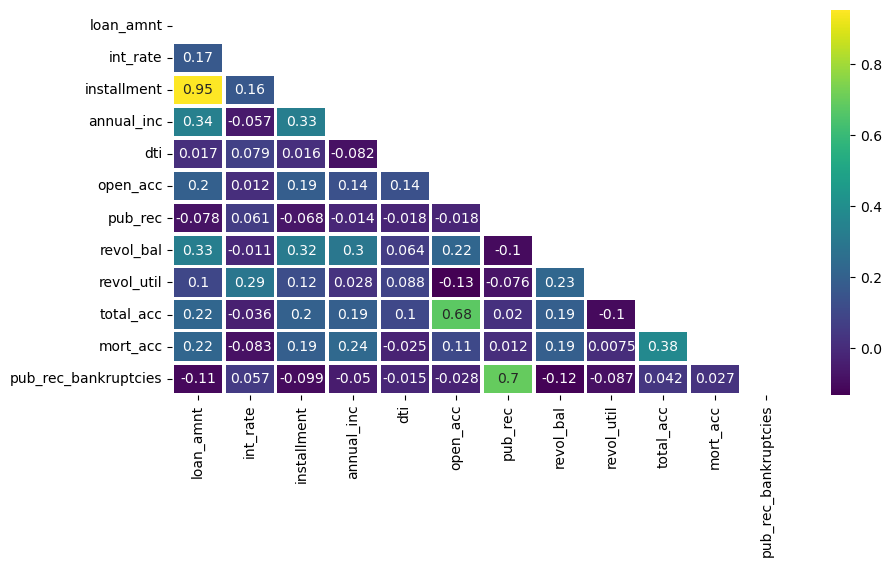

In [24]:
plt.figure(figsize=(10, 5), dpi=100)
sns.heatmap(matrix, mask=mask, annot=True, lw=2, cmap='viridis');

**kesimpulan:** terdapat nilai corelasi yang tinggi antara `installment` dengan `loan_amnt` dengan nilai `95%`

In [25]:
call_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [26]:
call_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [27]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [28]:
plt.style.use(['science','notebook','grid'])

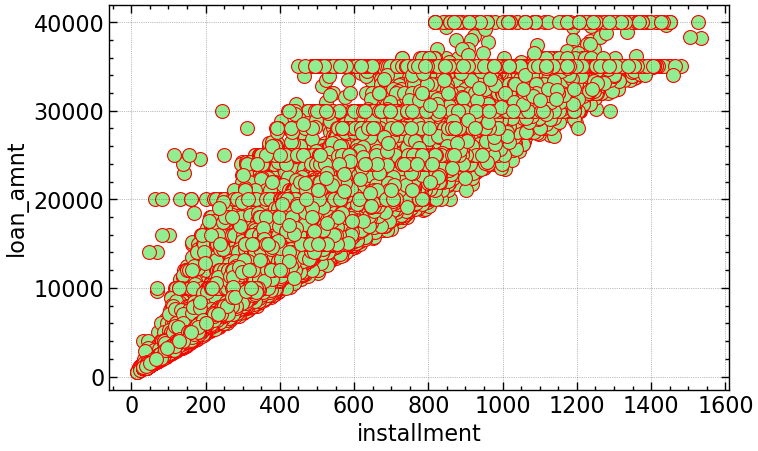

In [29]:
plt.figure(figsize =(8, 5), dpi=100)
sns.scatterplot(x='installment', y='loan_amnt', data=df, s=100, color='lightgreen', edgecolor='red');

**kesimpulan:** sangat masuk akal jika jumlah pinjaman besar maka cicilinya juga besar,
    semakin besar pinjamnnya maka jumlah angsurannya semakin besar
    
---

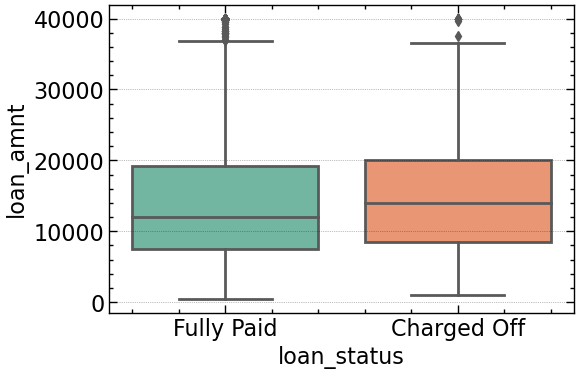

In [30]:
plt.figure(figsize=(6,4), dpi=100)
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='Set2');

**kesimpulan:** terdapat garis rata-rata `Charged Off` terlalu tinggi yang mengakibatkan kesulitan untuk menyelesaikan pinjaman
    dan pada status pinjaman mempunyai masin-masing `Data Outlier`

In [31]:
df.groupby('loan_status').describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

-----
-----

In [32]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [33]:
call_info('grade')

LC assigned loan grade


In [34]:
call_info('sub_grade')

LC assigned loan subgrade


In [35]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [36]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**kesimpulan:** Terdapat kesamaan antara `grade` dengan `subgrade`

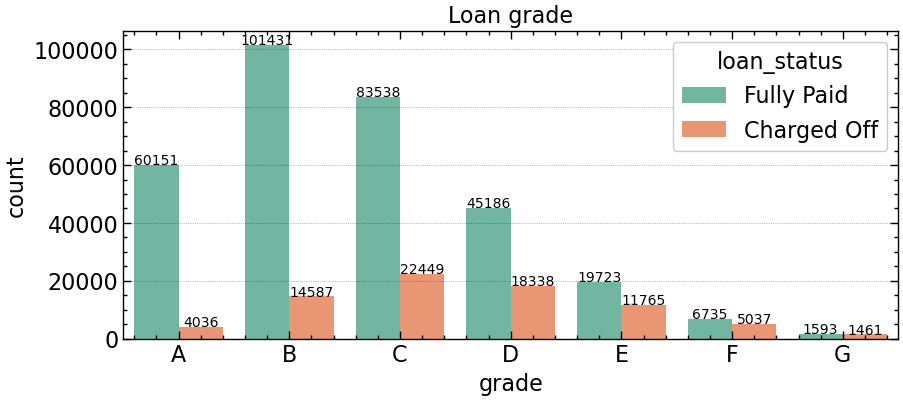

In [37]:
sort_grade = sorted(df['grade'].unique())
plt.figure(figsize=(10, 4), dpi=100)
ax = sns.countplot(x='grade', data=df,order = sort_grade, hue='loan_status',palette='Set2');

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2), 
            y = height + 200,
            s = '{:.0f}'.format(height),
            ha = 'center'
           )
plt.title('Loan grade');

**kesipulan:** jumlah pinjaman terbanyak terdapat pada `grade A B C`

----

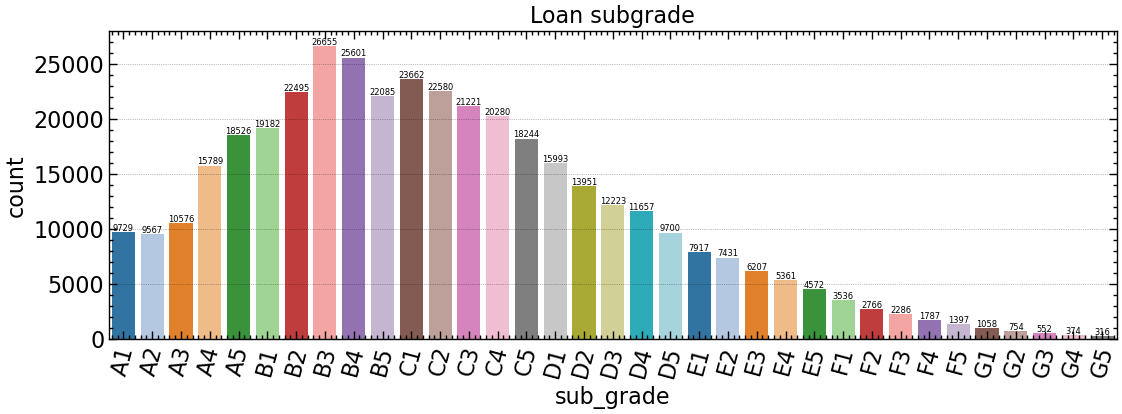

In [38]:
sort_subgrade = sorted(df['sub_grade'].unique())
plt.figure(figsize=(13, 4), dpi=100)
ax = sns.countplot(x='sub_grade', data=df, order= sort_subgrade, palette='tab20');

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),
            y = height+100,
            s = '{:.0f}'.format(height),
            ha = 'center',
            size = 6   
           )
plt.title('Loan subgrade');
plt.xticks(rotation = 75);

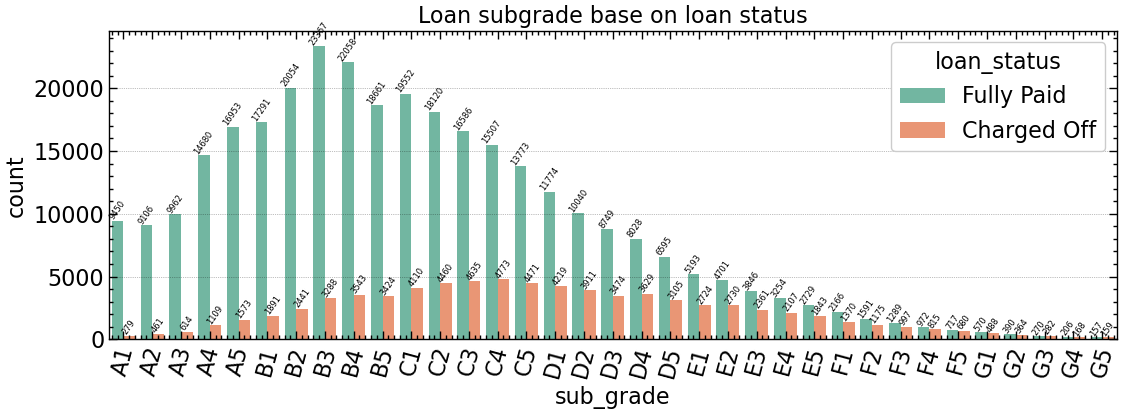

In [39]:
sort_subgrade = sorted(df['sub_grade'].unique())
plt.figure(figsize=(13, 4), dpi=100)
ax = sns.countplot(x='sub_grade', data=df, order= sort_subgrade, hue='loan_status', palette='Set2');

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),
            y = height+100,
            s = '{:.0f}'.format(height),
            ha = 'center', 
            size = 6,
            rotation = 55
           )
plt.title('Loan subgrade base on loan status');
plt.xticks(rotation = 75);

**kesipulan:** jumlah pinjaman terbanyak terdapat pada `subgrade A B C` dengan `Fully Paid` mengarah positif pada subgrade A B C

----

In [40]:
sort_fg = df[(df['grade']=='F') | (df['grade']=='G')]

In [41]:
sort_fg.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
66,15975.0,60 months,24.99,468.80,F,F4,carrier,5 years,MORTGAGE,47000.0,...,10.0,0.0,2049.0,58.5,23.0,w,INDIVIDUAL,1.0,0.0,"59681 Christopher Lock\r\nNorth Williamtown, U..."
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.0,...,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\r\nArmstrongton, TN 29597"


In [42]:
sorted_fg_sub = sorted(sort_fg['sub_grade'].unique())

In [43]:
sorted_fg_sub

['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

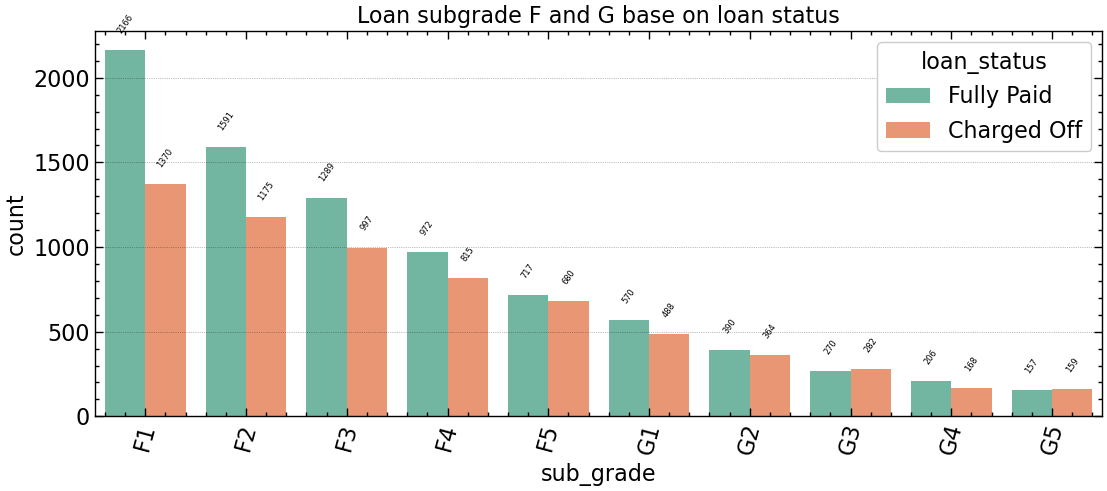

In [44]:

plt.figure(figsize=(13, 5), dpi=100)
ax = sns.countplot(x='sub_grade', data=df, order= sorted_fg_sub, hue='loan_status', palette='Set2');

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),
            y = height+100,
            s = '{:.0f}'.format(height),
            ha = 'center', 
            size = 6,
            rotation = 55
           )
plt.title('Loan subgrade F and G base on loan status');
plt.xticks(rotation = 75);

**kesimpulan:** sangat buruk grade F dan G hanya sedikit peminjam yang mau menggembailkan pinjaman `Fully Paid` kepada kepeminjam bahkan ada `Charged Off` ada yang melebihi grafik `Fully Paid`

---

In [45]:
# convert loan status fully paid 1 and charged off 0

df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [46]:
df['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

In [47]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


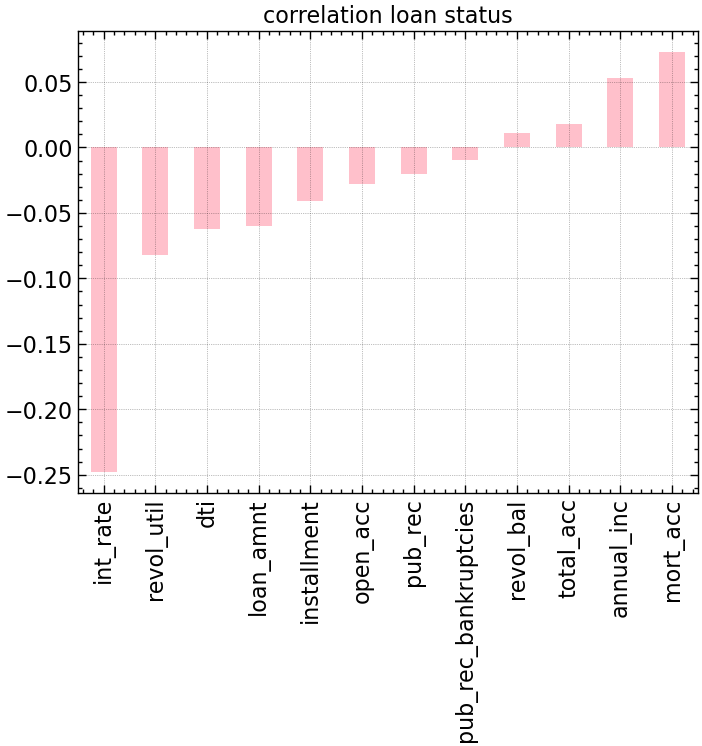

In [48]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar', color='pink');
plt.title('correlation loan status');

**kesimpulan:** `int_rate` mempunyai nilai corelasi negative yang cukup tinggi, jika suku bunga mengalami peningkatan maka akan sulit mengembalikan pinjaman

## 2. Data Preprocessing

In [49]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [50]:
df.shape

(396030, 28)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [52]:
# null values
df_null = df.isna().sum()
df_null

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [53]:
# percent missing values
percent_nan = round(100* df.isna().sum()/len(df),2)
percent_nan

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
loan_repaid             0.00
dtype: float64

**kesimpulan:** nan value tertinggi `mort_acc 9.54%` dan `emp_title 5.79`

In [54]:
call_info('emp_title')
print('\n')
call_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [55]:
df['emp_title'].nunique()

173105

In [56]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [57]:
df = df.drop('emp_title', axis=1)

---

In [58]:
df['emp_length'].nunique()

11

In [59]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [60]:
emp_length_sort = ['< 1 year', 
                   '1 year',
                   '2 years',
                   '3 years',
                   '4 years',
                   '5 years',
                   '6 years',
                   '7 years',
                   '8 years',
                   '9 years',
                   '10+ years']

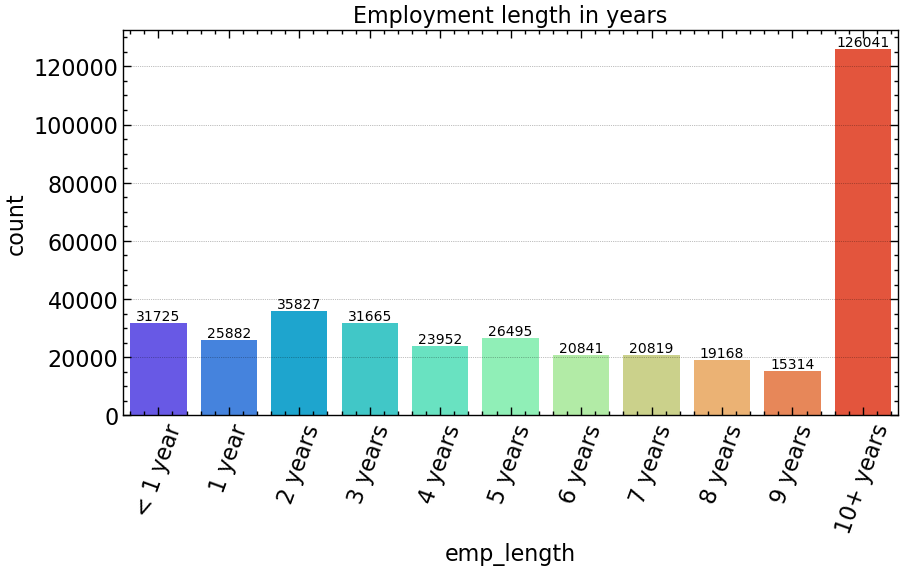

In [61]:
plt.figure(figsize=(10, 5), dpi=100)

ax = sns.countplot(x='emp_length', data=df, order=emp_length_sort, palette='rainbow');
for p in ax.patches:
    height = p.get_height()
    ax.text(x =p.get_x() + (p.get_width()/2), 
            y = height +1000,
            s = '{:.0f}'.format(height),
            ha = 'center'
            )
plt.title('Employment length in years')
plt.xticks(rotation =70);

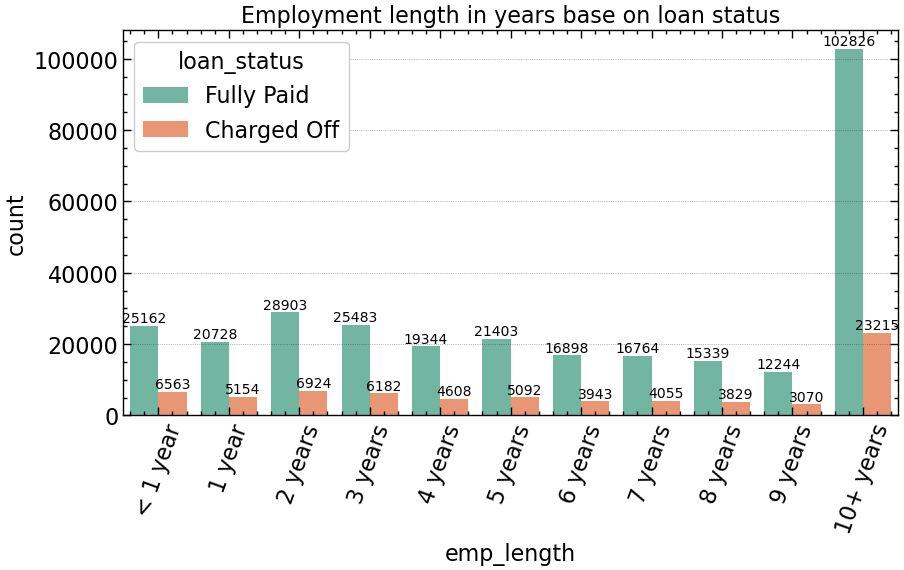

In [62]:
plt.figure(figsize=(10, 5), dpi=100)

ax = sns.countplot(x='emp_length', data=df, order=emp_length_sort,hue='loan_status', palette='Set2');
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),
            y = height+1000,
            s = '{:.0f}'.format(height),
            ha = 'center',
            size= 10
           )
plt.title('Employment length in years base on loan status')
plt.xticks(rotation =70);

In [63]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [64]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [65]:
emp_leng = emp_co/emp_fp

In [66]:
emp_leng

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

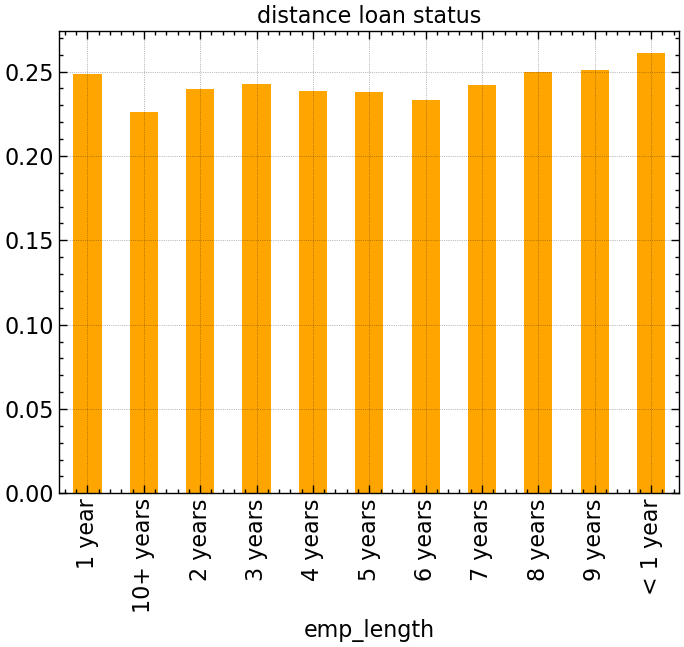

In [67]:
emp_leng.plot(kind='bar', color='orange');
plt.title('distance loan status');

In [68]:
# menghapus kolom emp length
df = df.drop('emp_length', axis =1)

----

In [69]:
 df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [70]:
call_info('title')

The loan title provided by the borrower


In [71]:
call_info('purpose')

A category provided by the borrower for the loan request. 


In [72]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [73]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [74]:
df = df.drop('title', axis=1)

---

In [75]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

## mort acc

In [76]:
call_info('mort_acc')

Number of mortgage accounts.


In [77]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [78]:
# mean mort acc per column
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [79]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [80]:
total_acc_avg[2.0]

0.0

In [81]:
# jika mort acc null maka akan diisi total acc avg
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [82]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [83]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

---

In [84]:
df = df.dropna()

In [85]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

--- 
----

## Categorycal and dummies

In [86]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1


In [87]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

## term

In [88]:
call_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [89]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [90]:
df['term'] = df['term'].apply(lambda date : int(date[:3]))

In [91]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

---

## grade

In [92]:
call_info('grade')

LC assigned loan grade


In [93]:
# drop grade

df = df.drop('grade', axis =1)

---

In [94]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

## sub_grade

In [95]:
call_info('sub_grade')

LC assigned loan subgrade


In [96]:
dummies_subgrade= pd.get_dummies(df['sub_grade'], drop_first=True)

In [97]:
dummies_subgrade

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df = df.drop('sub_grade', axis=1)

In [99]:
df = pd.concat([df,dummies_subgrade], axis=1)

In [100]:
df.shape

(395219, 57)

---

In [101]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [102]:
df[['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address']].head(4)

,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"


## convert dummies verification_status','purpose','initial_list_status','application_type

In [103]:
dummies = pd.get_dummies(df[['verification_status','purpose','initial_list_status','application_type']], drop_first=True)

In [140]:
dummies.head()

,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [105]:
df = df.drop(['verification_status','purpose','initial_list_status','application_type'], axis=1)

In [106]:
 df = pd.concat([df, dummies], axis=1)

In [107]:
df.shape

(395219, 71)

----

In [108]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

## home_ownership

In [109]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [110]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [111]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [112]:
home_dummies =pd.get_dummies(df['home_ownership'], drop_first=True)

In [113]:
home_dummies

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
396025,0,0,1
396026,0,0,0
396027,0,0,1
396028,0,0,0


In [114]:
df = df.drop('home_ownership', axis=1)

In [115]:
df = pd.concat([df, home_dummies], axis=1)

In [116]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'OTHER', 'O

---

In [117]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

## issue_d

In [118]:
call_info('issue_d')

The month which the loan was funded


In [119]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Oct-2007        1
Nov-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64

In [120]:
df = df.drop('issue_d', axis=1)

---

In [121]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line', 'address'], dtype='object')

## earliest_cr_line

In [122]:
call_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [123]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [124]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date : int(date[-4:]))

In [125]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

----

In [126]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'address'], dtype='object')

## address

In [127]:
df['address'].value_counts()

USCGC Smith\r\nFPO AE 70466                            8
USS Smith\r\nFPO AP 70466                              8
USS Johnson\r\nFPO AE 48052                            8
USNS Johnson\r\nFPO AE 05113                           8
USNS Johnson\r\nFPO AP 48052                           7
                                                      ..
43570 Maxwell Field Apt. 502\r\nEast John, NH 22690    1
9983 Turner Cove\r\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\r\nRalphfurt, CO 29597                 1
3841 Liu Crest\r\nClarkchester, NC 29597               1
787 Michelle Causeway\r\nBriannaton, AR 48052          1
Name: address, Length: 392898, dtype: int64

In [128]:
df['zip'] = df['address'].apply(lambda zip: zip[-5:])

In [129]:
df['zip'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip, dtype: int64

In [130]:
zip_dummies = pd.get_dummies(df['zip'], drop_first=True)

In [131]:
df = df.drop(['address','zip'], axis=1)

In [132]:
df = pd.concat([df,zip_dummies], axis=1)

In [133]:
df.head(2)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0


----

In [134]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [135]:
df = df.drop('loan_status', axis=1)

In [136]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [137]:
df.head(2)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0


In [138]:
len(df.columns)

79

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   earliest_cr_line                     395219 non-null  int64  
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

----
----

## 3. Train test split

In [141]:
len(df)

395219

In [142]:
X = df.drop('loan_repaid', axis =1).values
y = df['loan_repaid'].values

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [147]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316175, 78), (79044, 78), (316175,), (79044,))

---

## 4. Scaler data

----

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
scaler = MinMaxScaler()

In [150]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Model

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [153]:
X_train.shape

(316175, 78)

In [154]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

## 6. EarlyStopping

In [155]:
early_stop = EarlyStopping(monitor='val_loss', patience = 25, mode='min')

## 7. Fit and training model

In [157]:
model.fit(X_train, y_train, 
          epochs = 25, 
          batch_size = 256, 
          validation_data = (X_test, y_test), 
          callbacks = [early_stop], 
          verbose = 1)

Epoch 1/25
1236/1236 [==============================] - 12s 8ms/step - loss: 0.2968 - val_loss: 0.2687
Epoch 2/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.2653 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.2632 - val_loss: 0.2629
Epoch 4/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2620 - val_loss: 0.2622
Epoch 5/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.2611 - val_loss: 0.2625
Epoch 6/25
1236/1236 [==============================] - 10s 8ms/step - loss: 0.2604 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.2600 - val_loss: 0.2615
Epoch 8/25
1236/1236 [==============================] - 9s 8ms/step - loss: 0.2598 - val_loss: 0.2613
Epoch 9/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.2594 - val_loss: 0.2617
Epoch 10/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.

## 7. Evaluation and Prediction Model

In [158]:
losses = pd.DataFrame(model.history.history)

In [159]:
losses

,loss,val_loss
0,0.296807,0.268684
1,0.265275,0.263299
2,0.263206,0.262859
3,0.262012,0.262174
4,0.261126,0.262528
5,0.260399,0.261654
6,0.260008,0.261518
7,0.259780,0.261312
8,0.259388,0.261740
9,0.259221,0.261191


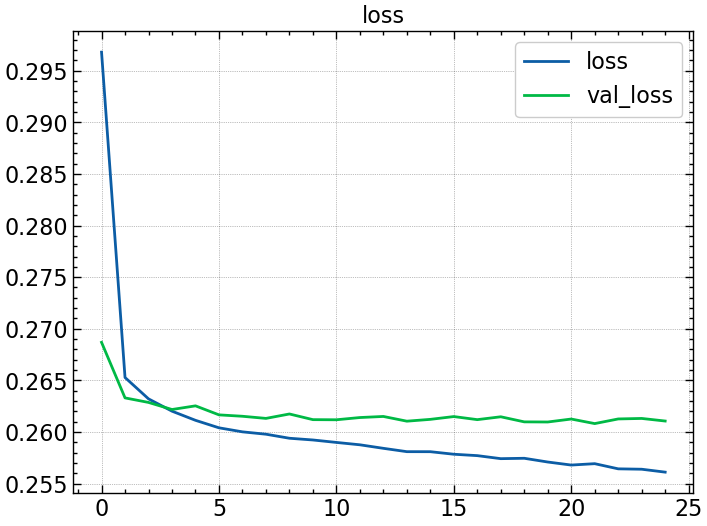

In [160]:
losses.plot(title='loss');

In [161]:
prediction = (model.predict(X_test)>0.5).astype('int32')

2471/2471 [==============================] - 7s 3ms/step


## 8. Evaluation  Metrics

In [162]:
from sklearn.metrics import classification_report, confusion_matrix

In [163]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [164]:
confusion_matrix(y_test, prediction)

array([[ 6848,  8810],
       [  105, 63281]], dtype=int64)

In [165]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [166]:
317696/ len(df) # nilai accuracy 80% pada  Fully Paid

0.8038479931379817

----
---

## 9. Mencoba memprediksi customer baru 
apakah dengan model yang dibuat dapat diprediksi dengan baik

In [167]:
np.random.seed(seed =101)

random_ind = np.random.randint(0, len(df))

new_customer = df.drop('loan_repaid', axis=1).iloc[random_ind]
new_customer

loan_amnt       35000.00
term               36.00
int_rate           19.99
installment      1300.55
annual_inc     120000.00
                 ...    
30723               0.00
48052               0.00
70466               0.00
86630               0.00
93700               0.00
Name: 177347, Length: 78, dtype: float64

In [168]:
X_test.shape

(79044, 78)

In [171]:
new_customer = new_customer.values.reshape(-1, 78)

In [172]:
new_predict = (model.predict(new_customer)>0.5).astype('int32')

1/1 [==============================] - 0s 93ms/step


In [173]:
new_predict 

array([[1]])

In [174]:
df.iloc[random_ind]['loan_repaid']

1.0

## 10. Save model

In [175]:
from tensorflow.keras.models import load_model

In [176]:
model.save('loan_predict.h5')

C:\Users\ibrahim\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


----
## Great job!
----
